# Unsupervised Learning

## K-Means Clustering

K-Means Clustering is an unsupervised learning algorithm, which works by grouping similar datapoints together. The algorithm is:
1. Assign 'k' cluster centroids randomly
2. Update cluster labels- assign points to the nearest centroid
3. Update centroids- set center to the mean of each cluster
Steps 3 and 4 are repeated until either centroids reach convergence, i.e., they cannot be moved furtherm, the maximum number of iterations has been reached.

In [51]:
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

In [52]:
def rotate(input_list):
    curr, prev = 0, 0
    if len(input_list) == 0:
        return input_list
    for index, el in enumerate(input_list):
        if index == 0:
            prev = el
        else:
            curr = el
            input_list[index] = prev
            prev = curr
    input_list[0] = curr
    return input_list
        

In [53]:
list1 = [1, 2, 3, 4]
rotate(list1)
print(f"list1 = {list1}")

list1 = [4, 1, 2, 3]


In [88]:
class KMeans():
    """Unsupervised machine learning algorithm which groups 'k' similar datapoints."""

    def __init__(self, k = 3, max_iter = 1000):
        """
        Constructor
        # Parameters
            k: default is 3
            max_iter: default is 1000
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = []
        self.clusters = [[] for _ in range(k)]
        self.x_size, self.num_features = 0, 0

    def predict(self, x_test):
        """
        This method predicts the clusters based on similarity.
        # Parameters
            x_test: Test data

        # Returns
            List of list of rows rows, where the index of lists at the second level indicates the cluster group.
            So, for return value [[row1, row2, row3], [row4, row5, row6]]],
            rows 1, 2, and 3 belong to cluster 0, and rows 4, 5, and 6 belong to cluster 1.
        """
        self.X = x_test
        converged = False
        #converting into appropriate format
        x_np = x_test.to_numpy()
        self.x_size, self.num_features = np.shape(x_np)
        #create random centroids
        random_sample_idxs = np.random.choice(self.x_size, self.k, replace = False)
        self.centroids = np.asarray([x_np[i] for i in random_sample_idxs])

        i = 1
        while (not converged and i < self.max_iter):
            # update cluster labels
            self.clusters = [[] for _ in range(self.k)]
            for j in range(len(x_np)):
                dist_arr = self.get_distance(x_np[j])
                self.clusters[np.argmin(dist_arr)].append(x_np[j])

            # update centroids
            old_centroids = self.centroids
            centroids = np.zeros((self.k, self.num_features))
            for idx, cluster in enumerate(self.clusters):
                cluster_mean = np.mean(x_np[idx], axis = 0)
                centroids[idx] = cluster_mean
            converged = (old_centroids == centroids.all).all()
            i += 1
        return self.clusters


    def get_distance(self, point):
        """Gets distance between two points. Used to assign points to the nearest centroid."""
        to_return = []
        dist = lambda x, y: np.sqrt(np.sum((x - y)**2))
        for centroid in self.centroids:
            to_return.append(dist(centroid, point))
        # return np.ndarray(to_return)
        return np.asarray(to_return, dtype = np.float32)
    
    def plot(self):
        """Plots the clusters. Plotting is done between the index of the rows of each row in a cluster and the cluster number.
        Can be compared with a plot between index number of row and label to check accuracy."""
        x = []
        y = []
        for i, cluster in enumerate(self.clusters):
            for j, datapoint in enumerate(cluster):
                matching_rows_index = np.where(np.all(self.X.values == datapoint, axis = 1))
                x.append(matching_rows_index[0][0])
                y.append(int(i))
        plt.scatter(x, y)
        plt.xlabel("Index")
        plt.ylabel("Cluster")
        plt.show()
    

## Principal Component Analysis

### Theory

Principal Component Analysis (PCA) is an unsupervised machine learning algorithm, which has applications in dimensionality reduction of data. PCA is used for feature extraction by condensing the data into lesser dimensions while preserving as much information of the original data as possible. Such reduction helps to prevent the model from overfitting on the training data, and can also enable us to visualize it. 

<!-- **Math** -->
#### Math
<!-- <br> -->
PCA works by first projecting the datapoints onto a unit vector, and then choosing whichever vector captures the highest variance as the principal component.
$$
    Proj_{p}u = {P.u} \over ||u||
$$
Since $u$ is a unit vector, $||u||$ is equal to 1. So, the equation becomes,
$$
    Proj_{p}u = {P.u}
$$
Hence, to get the projection of a point on a unit vector, we just calculate the dot product between the two.
<br>
<!-- <br> -->
<!-- **Working** -->
#### Working
<!-- <br> -->
We first find the covariance matrix between all attributes, and then find eigenvectors and eigenvalues from this vector. The eigenvectors with the maximum eigenvalues will be the principal components. Then, to project all datapoints on the principal components, we take the dot product of the datapoints with the components.

### Implementation

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
class PCA:

    def __init__(self, num_components):
        self.num_components = num_components
        self.eigenvalues = None
        self.eigenvectors = None
        self.X = None

    def fit(self, x_train):
        self.X = x_train
        self.mean = np.mean(x_train, axis = 0)
        self.X -= self.mean
        cov = np.cov(self.X.T)
        eigenvectors, eigenvalues = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors[:self.num_components]

    def transform(self):
        return np.dot(self.X, self.components.T)

## Example Dataset

In [57]:
df = pd.read_csv('./Iris Dataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

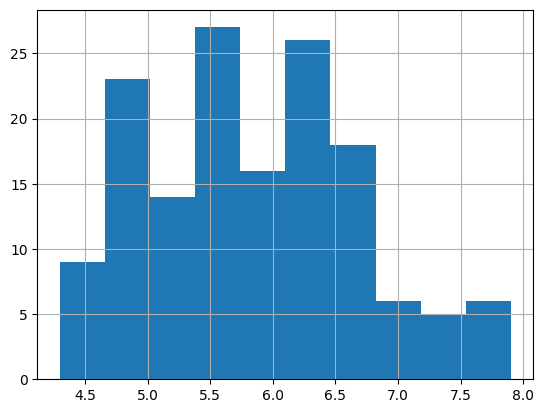

In [58]:
df['SepalLengthCm'].hist()

<Axes: >

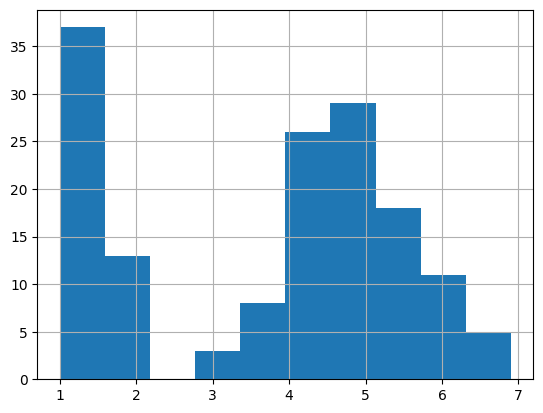

In [59]:
df['PetalLengthCm'].hist()

<Axes: >

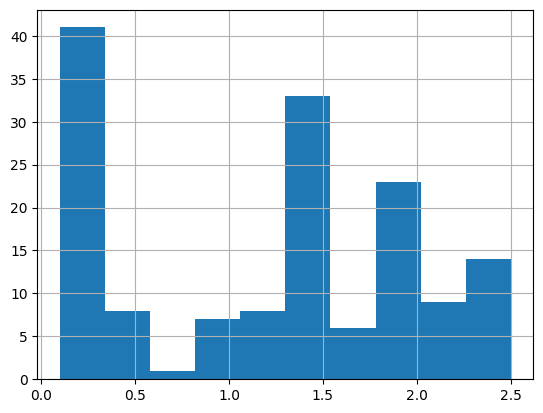

In [60]:
df['PetalWidthCm'].hist()

<Axes: >

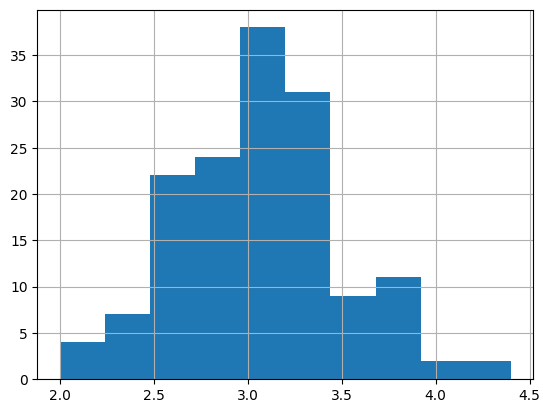

In [61]:
df['SepalWidthCm'].hist()

Removing the 'Species' column and storing it for later comparison.

In [62]:
y_test = df['Species']
x_train = df.drop(['Species'], axis = 1)

### Testing K-Means

In [87]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [98]:
k_means = KMeans()
k_means.predict(x_train);

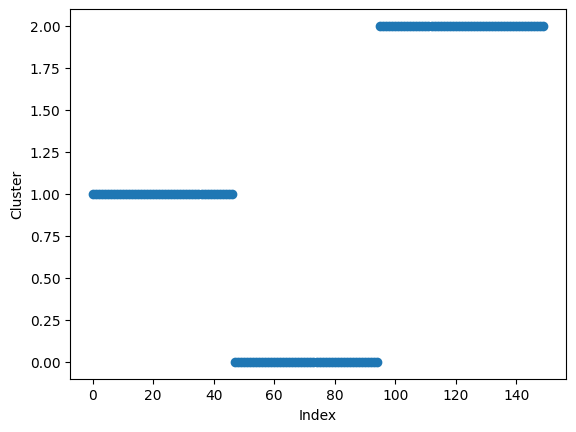

In [99]:
k_means.plot()

Text(0, 0.5, 'Index')

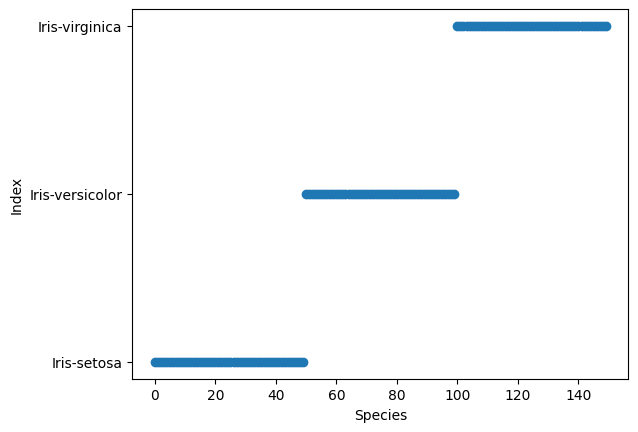

In [100]:
plt.scatter(x_train.index, y_test)
plt.xlabel("Species")
plt.ylabel("Index")

Here, we can clearly see that our model clusters the data well, as most point belonging to a particular species are clustered in the same group.
<br>
In this case, cluster 0 corresponds to Iris-versicolor, cluster 1 corresponds to Iris-setosa, and cluster 2 corresponds to Iris-virginica.

### Testing PCA

Creating a new PCA object and training and transforming the data.

In [ ]:
pca = PCA(2)
pca.fit(x_train)
x_new = pca.transform()

In [ ]:
print(f"Shape of original data: {x_train.shape}\nShape of new data: {x_new.shape}")

Shape of original data: (150, 5)
Shape of new data: (150, 2)


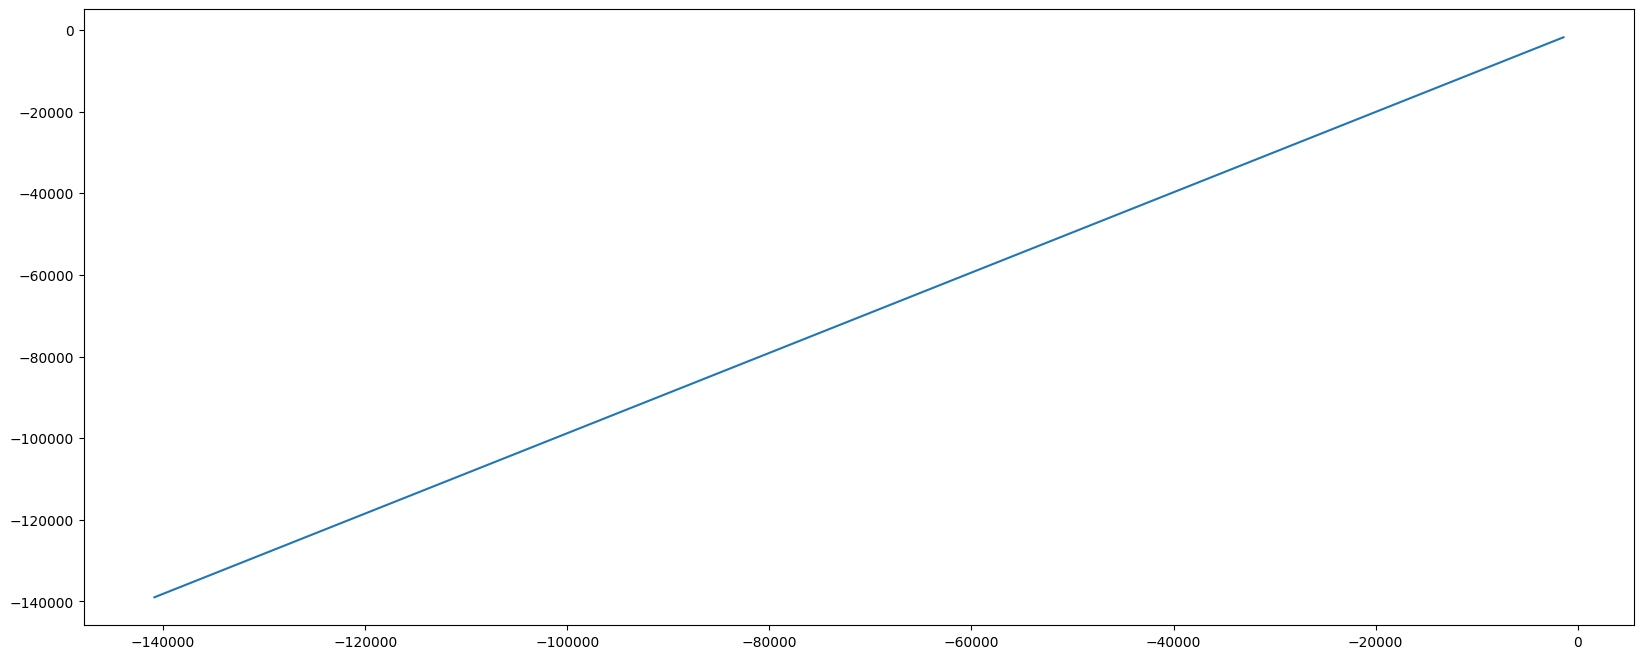

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(x_new[0], x_new[1])
plt.show()

We can see that the original dataset had a sample size of 150 samples and 5 attributes, whereas after the PCA, the dataset has the same number of samples but only 2 attributes.
<br>
Hence, using PCA, we have successfully reduced the number of dimensions of the dataset.